In [19]:
from util import *
from glob import glob
import matplotlib.pyplot as plt
from shapely import wkt
pd.set_option("display.max_columns", None)

In [20]:
gdf = gpd.read_file(f"Manuwatu_Test/transects_intersects_20240315_120828.geojson")
gdf["Date"] = pd.to_datetime(gdf.ShorelineID, dayfirst=True, format='mixed')
gdf["Year"] = gdf.Date.dt.year
gdf["YearsSinceBase"] = (gdf.Date - pd.Timestamp(1800, 1, 1)).dt.days / 365.25
gdf["YearsUntilFuture"] = (
    pd.Timestamp(2100, 1, 1) - gdf.Date
    ).dt.days / 365.25
gdf.Date = gdf.Date.astype(str)
gdf

,TransectID,ShorelineID,BaselineID,Distance,IntersectX,IntersectY,Uncertainty,geometry,Date,Year,YearsSinceBase,YearsUntilFuture
0,1,05/12/2020,0,-30.72,1.664823e+06,5.652036e+06,10.00,POINT (1664822.752 5652035.621),2020-12-05,2020,220.922656,79.071869
1,1,11/02/2017,0,-29.69,1.664822e+06,5.652035e+06,10.00,POINT (1664821.739 5652035.474),2017-02-11,2017,217.108830,82.885695
2,1,08/11/1970,0,-27.86,1.664820e+06,5.652035e+06,2.63,POINT (1664819.922 5652035.211),1970-11-08,1970,170.847365,129.147159
3,1,19/09/1955,0,-25.63,1.664818e+06,5.652035e+06,2.68,POINT (1664817.715 5652034.890),1955-09-19,1955,155.709788,144.284736
4,2,05/12/2020,0,-31.94,1.664830e+06,5.651936e+06,10.00,POINT (1664830.066 5651936.243),2020-12-05,2020,220.922656,79.071869
...,...,...,...,...,...,...,...,...,...,...,...,...
9214,1925,23/01/2016,244,-39.52,1.904293e+06,5.511354e+06,1.02,POINT (1904293.154 5511353.967),2016-01-23,2016,216.054757,83.939767
9215,1925,31/03/1944,244,-29.47,1.904294e+06,5.511344e+06,2.27,POINT (1904293.505 5511343.923),1944-03-31,1944,144.240931,155.753593
9216,1926,29/04/2021,244,-36.22,1.904393e+06,5.511358e+06,1.02,POINT (1904392.891 5511358.332),2021-04-29,2021,221.319644,78.674880
9217,1926,23/01/2016,244,-36.58,1.904393e+06,5.511359e+06,1.02,POINT (1904392.878 5511358.698),2016-01-23,2016,216.054757,83.939767


In [21]:
#DSASv6 does not produce an azimuth attribute in the transect file so either need to calculate geometry in ArcGIS Pro or add code
transect_metadata = get_transect_metadata(f"Manuwatu_Test/t10_transects_azi.shp")

In [22]:
linear_models = fit(gdf, transect_metadata)
rolled_slopes = linear_models.groupby("group").slope.rolling(10, min_periods=1).mean().dropna().reset_index(level=0)
linear_models.slope = rolled_slopes.slope
linear_models.dropna(inplace=True)
linear_models

c:\Users\lalit\anaconda3\envs\environment\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\lalit\anaconda3\envs\environment\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\lalit\anaconda3\envs\environment\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,TransectID,slope,intercept,group,r2_score,mae,mse,rmse
0,1,-0.065571,-15.941371,1,0.926099,0.504336,0.276915,0.526227
1,2,-0.090784,-11.259434,2,0.957393,0.507380,0.296034,0.544090
2,3,-0.055217,-15.562882,3,0.589842,1.023301,1.711207,1.308131
3,4,-0.056033,-15.276985,4,0.686399,0.931125,1.157774,1.075999
4,5,-0.078909,-13.214268,5,0.760956,1.230886,1.578735,1.256477
...,...,...,...,...,...,...,...,...
1851,1889,0.697474,-177.961444,1814,0.987077,2.072922,5.907112,2.430455
1852,1890,0.504762,-137.189692,1815,0.940043,3.120928,15.071875,3.882251
1853,1891,0.679716,-170.487991,1816,0.926667,4.969595,33.909953,5.823225
1854,1892,0.691427,-179.334549,1817,0.907356,5.639613,45.272000,6.728447


In [23]:
results = predict(gdf, linear_models, transect_metadata)
results

,TransectID,slope,intercept,group,r2_score,mae,mse,rmse,BaselineID,Year,ocean_point,linear_model_point,linear_model_predicted_distance,linear_model_distance,sqrt_model_point,sqrt_model_predicted_distance,sqrt_model_distance,BH_model_point,BH_model_predicted_distance,BH_model_distance,Sunamura_model_point,Sunamura_model_predicted_distance,Sunamura_model_distance
0,1.0,-0.065571,-15.941371,1.0,0.926099,0.504336,0.276915,0.526227,0,2100,POINT (1664328.124468866 5651962.524324183),POINT (1664818.5111506921 5652034.994638659),-26.432663,-4.287337,POINT (1664831.3397713955 5652036.890477618),-39.400612,8.680612,POINT (1664853.6597205761 5652040.188963886),-61.962974,31.242974,POINT (1664829.3575427323 5652036.597539943),-37.396855,6.676855
1,2.0,-0.090784,-11.259434,2.0,0.957393,0.507380,0.296034,0.544090,0,2100,POINT (1664336.6681260406 5651855.257598402),POINT (1664823.991953357 5651935.246446106),-25.784842,-6.155158,POINT (1664841.7092650456 5651938.154548002),-43.739234,11.799234,POINT (1664859.0531011391 5651941.001347986),-61.315153,29.375153,POINT (1664834.808042732 5651937.021788244),-36.745665,4.805665
2,3.0,-0.055217,-15.562882,3.0,0.589842,1.023301,1.711207,1.308131,0,2100,POINT (1664335.6734834635 5651752.936539125),POINT (1664824.9457491315 5651835.548571217),-24.397640,-3.802360,POINT (1664835.713696601 5651837.366704156),-35.318002,7.118002,POINT (1664859.9801673286 5651841.46401888),-59.927951,31.727951,POINT (1664835.7582798908 5651837.374231899),-35.363216,7.163216
3,4.0,-0.056033,-15.276985,4.0,0.686399,0.931125,1.157774,1.075999,0,2100,POINT (1664348.616885819 5651632.510409517),POINT (1664833.679183973 5651736.013771801),-24.242237,-4.017763,POINT (1664844.5168621864 5651738.326332762),-35.323898,7.063898,POINT (1664868.427231171 5651743.428365207),-59.772547,31.512547,POINT (1664844.4032266033 5651738.3020850215),-35.207704,6.947704
4,5.0,-0.078909,-13.214268,5.0,0.760956,1.230886,1.578735,1.256477,0,2100,POINT (1664374.274382625 5651537.380842645),POINT (1664857.4561394472 5651640.196707681),-25.839709,-6.000291,POINT (1664872.720292916 5651643.444754861),-41.445611,9.605611,POINT (1664892.208382511 5651647.59161008),-61.370019,29.530019,POINT (1664868.1784864904 5651642.478307454),-36.802118,4.962118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,1889.0,0.697474,-177.961444,1814.0,0.987077,2.072922,5.907112,2.430455,243,2100,POINT (1900819.7878661277 5510122.869685081),POINT (1900805.410786617 5510663.003905922),-66.365529,40.325529,POINT (1900809.0811227628 5510525.1126079885),71.574608,-97.614608,POINT (1900804.4653896757 5510698.521636763),-101.895839,75.855839,POINT (1900805.116335803 5510674.066163804),-77.431705,51.391705
1849,1890.0,0.504762,-137.189692,1815.0,0.940043,3.120928,15.071875,3.882251,243,2100,POINT (1900914.2821657087 5510166.770838147),POINT (1900895.868520329 5510693.276648482),-56.427705,26.827705,POINT (1900899.3576774145 5510593.510337097),43.399602,-72.999602,POINT (1900894.6266673747 5510728.785249986),-91.958016,62.358016,POINT (1900895.4826363588 5510704.310322054),-67.468124,37.868124
1850,1891.0,0.679716,-170.487991,1816.0,0.926667,4.969595,33.909953,5.823225,243,2100,POINT (1901012.007003875 5510196.853486324),POINT (1900992.265846799 5510733.423911115),-61.733454,36.933454,POINT (1900997.208292204 5510599.086799048),72.694547,-97.494547,POINT (1900990.9595220773 5510768.930199223),-97.263765,72.463765,POINT (1900991.8590696445 5510744.480233177),-72.797256,47.997256
1851,1892.0,0.691427,-179.334549,1817.0,0.907356,5.639613,45.272000,6.728447,243,2100,POINT (1901220.5738396354 5510268.73627425),POINT (1901070.3727017883 5510781.923495236),-68.706285,34.716285,POINT (1901108.783936204 5510650.685110981),68.037769,-102.027769,POINT (1901060.3922818056 5510816.023263511),-104.236596,70.246596,POINT (1901067.2644538074 5510792.543342505),-79.771653,45.781653


In [24]:
columns_to_remove = ["sqrt_model_point", "sqrt_model_predicted_distance", "sqrt_model_distance",
                     "BH_model_point", "BH_model_predicted_distance", "BH_model_distance",
                     "Sunamura_model_point", "Sunamura_model_predicted_distance", "Sunamura_model_distance"]

results.drop(columns=columns_to_remove, inplace=True)

In [25]:
results.set_geometry("linear_model_point", inplace=True, crs=2193)
results

,TransectID,slope,intercept,group,r2_score,mae,mse,rmse,BaselineID,Year,ocean_point,linear_model_point,linear_model_predicted_distance,linear_model_distance
0,1.0,-0.065571,-15.941371,1.0,0.926099,0.504336,0.276915,0.526227,0,2100,POINT (1664328.124468866 5651962.524324183),POINT (1664818.511 5652034.995),-26.432663,-4.287337
1,2.0,-0.090784,-11.259434,2.0,0.957393,0.507380,0.296034,0.544090,0,2100,POINT (1664336.6681260406 5651855.257598402),POINT (1664823.992 5651935.246),-25.784842,-6.155158
2,3.0,-0.055217,-15.562882,3.0,0.589842,1.023301,1.711207,1.308131,0,2100,POINT (1664335.6734834635 5651752.936539125),POINT (1664824.946 5651835.549),-24.397640,-3.802360
3,4.0,-0.056033,-15.276985,4.0,0.686399,0.931125,1.157774,1.075999,0,2100,POINT (1664348.616885819 5651632.510409517),POINT (1664833.679 5651736.014),-24.242237,-4.017763
4,5.0,-0.078909,-13.214268,5.0,0.760956,1.230886,1.578735,1.256477,0,2100,POINT (1664374.274382625 5651537.380842645),POINT (1664857.456 5651640.197),-25.839709,-6.000291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,1889.0,0.697474,-177.961444,1814.0,0.987077,2.072922,5.907112,2.430455,243,2100,POINT (1900819.7878661277 5510122.869685081),POINT (1900805.411 5510663.004),-66.365529,40.325529
1849,1890.0,0.504762,-137.189692,1815.0,0.940043,3.120928,15.071875,3.882251,243,2100,POINT (1900914.2821657087 5510166.770838147),POINT (1900895.869 5510693.277),-56.427705,26.827705
1850,1891.0,0.679716,-170.487991,1816.0,0.926667,4.969595,33.909953,5.823225,243,2100,POINT (1901012.007003875 5510196.853486324),POINT (1900992.266 5510733.424),-61.733454,36.933454
1851,1892.0,0.691427,-179.334549,1817.0,0.907356,5.639613,45.272000,6.728447,243,2100,POINT (1901220.5738396354 5510268.73627425),POINT (1901070.373 5510781.923),-68.706285,34.716285


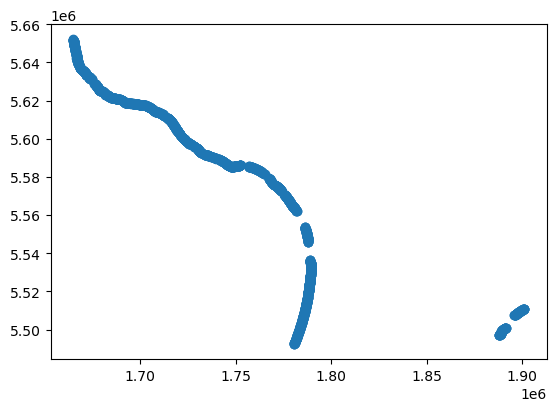

In [26]:
results.plot()
plt.show()

In [18]:
#Only run this code if value in group column is different for all rows
default_value = 1
column = 'group'
df = results
results[column] = default_value
results

TypeError: __new__() takes 1 positional argument but 2 were given

In [27]:
results = prediction_results_to_polygon(results)
output_shapefile = "Manuwatu_Test/projection_output.shp"
results.to_file(output_shapefile, driver="ESRI Shapefile")

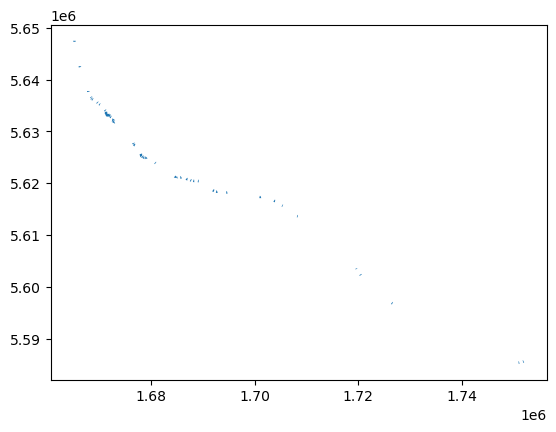

In [28]:
results.plot()
plt.show()